In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import seaborn as sns
%matplotlib inline

In [2]:
ds = pd.read_csv('Mall_Customers.csv')

In [3]:
ds.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
ds.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
ds["CustomerID"].value_counts()

CustomerID
1      1
138    1
128    1
129    1
130    1
      ..
70     1
71     1
72     1
73     1
200    1
Name: count, Length: 200, dtype: int64

In [1]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [21]:
ds.drop('CustomerID', axis=1, inplace=True)
ds['Genre'] = LabelEncoder().fit_transform(ds['Genre'])

In [22]:
X = ds[['Annual Income (k$)', 'Spending Score (1-100)']]


In [23]:
# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

In [25]:
# 1. KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train)

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
# 2. Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(X_train)

In [27]:
# KMeans Evaluation
print("KMeans Silhouette Score:", silhouette_score(X_train, kmeans_labels))
print("KMeans Inertia:", kmeans.inertia_)

# Agglomerative Clustering Evaluation
print("Agglomerative Silhouette Score:", silhouette_score(X_train, agglo_labels))


KMeans Silhouette Score: 0.5509842461121202
KMeans Inertia: 56.252945088562036
Agglomerative Silhouette Score: 0.5523700957479284


Text(0.5, 1.0, 'KMeans Clustering')

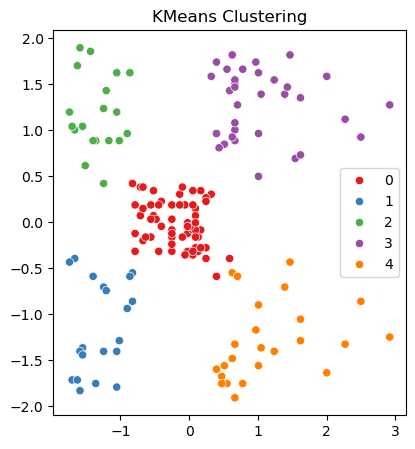

In [28]:
# Visualization
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=kmeans_labels, palette="Set1")
plt.title('KMeans Clustering')

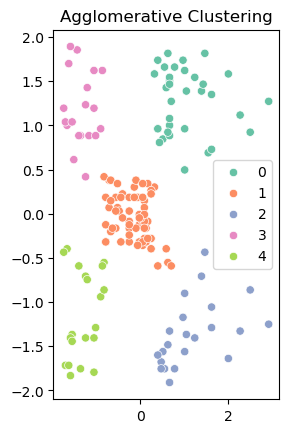

In [29]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=agglo_labels, palette="Set2")
plt.title('Agglomerative Clustering')
plt.show()

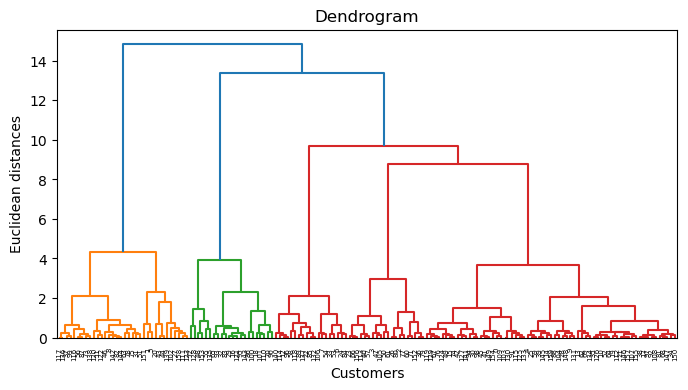

In [30]:
# Dendrogram (optional for Hierarchical)
plt.figure(figsize=(8, 4))
dendrogram = sch.dendrogram(sch.linkage(X_train, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [31]:
### e) Cross-Validation (Pseudo via repeated runs)
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K={k}, Silhouette Score = {score:.3f}")

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

K=2, Silhouette Score = 0.321
K=3, Silhouette Score = 0.467
K=4, Silhouette Score = 0.494
K=5, Silhouette Score = 0.555
K=6, Silhouette Score = 0.540
K=7, Silhouette Score = 0.528
K=8, Silhouette Score = 0.455


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

K=9, Silhouette Score = 0.457
K=10, Silhouette Score = 0.443


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
